In [13]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df1 = pd.read_excel('FCR prices.xlsx')
df1 = df1[['DATE_FROM', 'NL_SETTLEMENTCAPACITY_PRICE_[EUR/MW]']]
df1.columns = ['Date', 'Price']

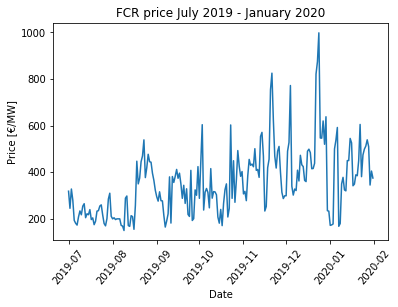

In [15]:
x = df1['Date']
y = df1['Price']
plt.plot(x, y)
plt.xticks(rotation = 50)
plt.xlabel('Date') 
plt.ylabel('Price [€/MW]') 
plt.title('FCR price July 2019 - January 2020') 
plt.savefig('FCR price July 2019 - January 2020.png')
plt.show() 

# Prepare the data

In [16]:
# Double the dataframe to extrapolate the data to a whole year
df2 = df1.append(df1, ignore_index = True)
df2 = df2[:365]
df2 = df2.reset_index(drop = True)

In [17]:
# Replace date to a datetime format
a = dt.date(2019, 1, 1)
datelist = []
for x in range(365):
    datelist.append(a + dt.timedelta(days = x))
    
df2['Date'] = datelist

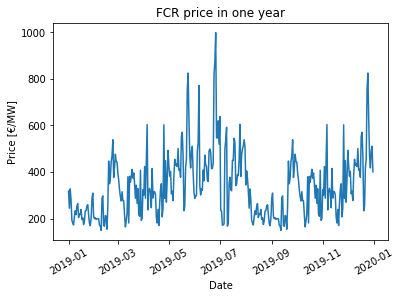

In [18]:
x = df2['Date']
y = df2['Price']
plt.plot(x, y)
plt.xticks(rotation = 30)
plt.xlabel('Date') 
plt.ylabel('Price [€/MW]') 
plt.title('FCR price in one year') 
plt.savefig('FCR price year.png')
plt.show() 

In [19]:
# Expand the dataframe to add the times
df3 = pd.concat([df2]*96, ignore_index=True)
df3 = df3.sort_values(['Date'], ascending = True)
df3 = df3.reset_index(drop = True)

In [20]:
# Add time to the dataframe
T = ['00:00', '00:15', '00:30', '00:45', '01:00', '01:15', '01:30', '01:45', '02:00', '02:15', '02:30', '02:45', '03:00', '03:15', '03:30', '03:45', '04:00', '04:15', '04:30', '04:45', '05:00', '05:15', '05:30', '05:45', '06:00', '06:15', '06:30', '06:45', '07:00', '07:15', '07:30', '07:45', '08:00', '08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45', '10:00', '10:15', '10:30', '10:45', '11:00', '11:15', '11:30', '11:45', '12:00', '12:15', '12:30', '12:45', '13:00', '13:15', '13:30', '13:45', '14:00', '14:15', '14:30', '14:45', '15:00', '15:15', '15:30', '15:45', '16:00', '16:15', '16:30', '16:45', '17:00', '17:15', '17:30', '17:45', '18:00', '18:15', '18:30', '18:45', '19:00', '19:15', '19:30', '19:45', '20:00', '20:15', '20:30', '20:45', '21:00', '21:15', '21:30', '21:45', '22:00', '22:15', '22:30', '22:45', '23:00', '23:15', '23:30', '23:45']
T365 = T * 365
df3['Time'] = T365
df3 = df3[['Date', 'Time', 'Price']]

In [21]:
# Divide by 96 to convert the FCR price per day to FCR price per time step
df3['Price'] = df3['Price'] / 96

In [22]:
df3.to_csv('FCR Settlement Price.csv')